In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

data\data.csv
data\emotions.csv
data\haberman.csv
data\imagini.jpg
data\iris.csv
data\negetive.csv
data\positive.csv
data\poze.db
data\recunosc.db
data\spam.csv
data\untitled.txt
data\world-happiness-report-2017.csv
data\Actor_01\03-01-01-01-01-01-01.wav
data\Actor_01\03-01-01-01-01-02-01.wav
data\Actor_01\03-01-01-01-02-01-01.wav
data\Actor_01\03-01-01-01-02-02-01.wav
data\Actor_01\03-01-02-01-01-01-01.wav
data\Actor_01\03-01-02-01-01-02-01.wav
data\Actor_01\03-01-02-01-02-01-01.wav
data\Actor_01\03-01-02-01-02-02-01.wav
data\Actor_01\03-01-02-02-01-01-01.wav
data\Actor_01\03-01-02-02-01-02-01.wav
data\Actor_01\03-01-02-02-02-01-01.wav
data\Actor_01\03-01-02-02-02-02-01.wav
data\Actor_01\03-01-03-01-01-01-01.wav
data\Actor_01\03-01-03-01-01-02-01.wav
data\Actor_01\03-01-03-01-02-01-01.wav
data\Actor_01\03-01-03-01-02-02-01.wav
data\Actor_01\03-01-03-02-01-01-01.wav
data\Actor_01\03-01-03-02-01-02-01.wav
data\Actor_01\03-01-03-02-02-01-01.wav
data\Actor_01\03-01-03-02-02-02-01.wav
data

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa as ls
import os

In [78]:
emotion_dic = {
                '01' : 'neutral', 
                '02' : 'calm' ,
                '03' : 'happy' ,
                '04' : 'sad' ,
                '05' : 'angry', 
                '06' : 'fearful' ,
                '07' : 'disgust', 
                '08' : 'surprised'
}

In [79]:
our_emotion = ['happy','sad','angry','disgust']

In [80]:
from glob import glob

In [81]:
def extract_feature(file_name, mfcc, chroma, mel):
        X,sample_rate = ls.load(file_name)
        if chroma:
            stft=np.abs(ls.stft(X))
            result=np.array([])
        if mfcc:
            mfccs=np.mean(ls.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(ls.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(ls.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result


In [82]:
audio_files = glob('data/Actor_*/*.wav')
print(audio_files)

['data\\Actor_01\\03-01-01-01-01-01-01.wav', 'data\\Actor_01\\03-01-01-01-01-02-01.wav', 'data\\Actor_01\\03-01-01-01-02-01-01.wav', 'data\\Actor_01\\03-01-01-01-02-02-01.wav', 'data\\Actor_01\\03-01-02-01-01-01-01.wav', 'data\\Actor_01\\03-01-02-01-01-02-01.wav', 'data\\Actor_01\\03-01-02-01-02-01-01.wav', 'data\\Actor_01\\03-01-02-01-02-02-01.wav', 'data\\Actor_01\\03-01-02-02-01-01-01.wav', 'data\\Actor_01\\03-01-02-02-01-02-01.wav', 'data\\Actor_01\\03-01-02-02-02-01-01.wav', 'data\\Actor_01\\03-01-02-02-02-02-01.wav', 'data\\Actor_01\\03-01-03-01-01-01-01.wav', 'data\\Actor_01\\03-01-03-01-01-02-01.wav', 'data\\Actor_01\\03-01-03-01-02-01-01.wav', 'data\\Actor_01\\03-01-03-01-02-02-01.wav', 'data\\Actor_01\\03-01-03-02-01-01-01.wav', 'data\\Actor_01\\03-01-03-02-01-02-01.wav', 'data\\Actor_01\\03-01-03-02-02-01-01.wav', 'data\\Actor_01\\03-01-03-02-02-02-01.wav', 'data\\Actor_01\\03-01-04-01-01-01-01.wav', 'data\\Actor_01\\03-01-04-01-01-02-01.wav', 'data\\Actor_01\\03-01-04-01-02

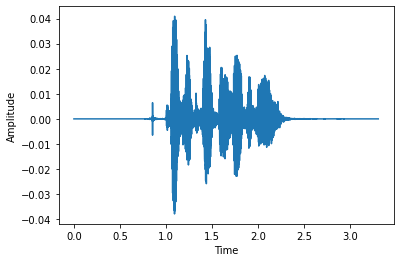

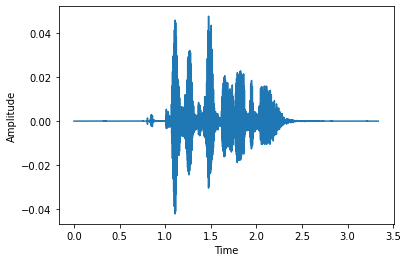

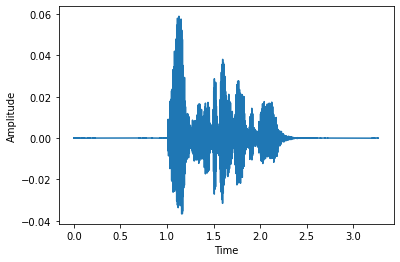

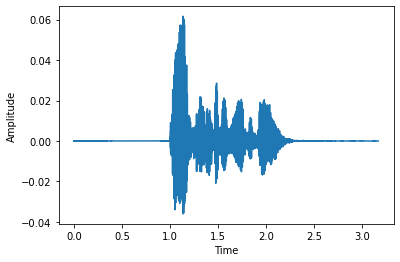

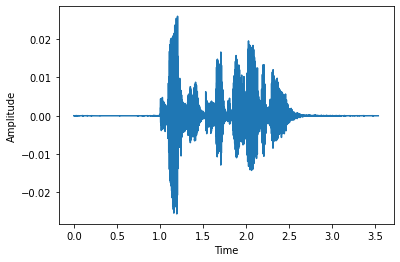

In [83]:
for i in range(5):
    audio,sfreq = ls.load(audio_files[i])
    time = np.arange(0,len(audio))/sfreq
    fig,ax = plt.subplots()
    ax.plot(time,audio)
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

In [84]:
x,y=[],[]
from IPython.display import clear_output
e = set()
for file in audio_files:
        clear_output(wait=True)
        file_name = file.split('\\')[-1]
        emotion=emotion_dic[file_name.split("-")[2]]
        if emotion not in our_emotion:
            continue
        e.add(file.split('\\')[-2])
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        print(e)
        x.append(feature)
        y.append(emotion)

In [85]:
x = np.array(x)
x

array([[-6.54258545e+02,  7.46895599e+01, -1.54391470e+01, ...,
         1.92476538e-16,  1.75645808e-16,  1.83483192e-16],
       [-6.38053345e+02,  7.23788528e+01, -1.46630468e+01, ...,
         2.58530311e-16,  2.49482093e-16,  2.57258729e-16],
       [-6.63349365e+02,  7.24170914e+01, -1.20227699e+01, ...,
         3.38210634e-14,  3.22383721e-14,  3.13225804e-14],
       ...,
       [-5.14733948e+02,  4.83478889e+01, -3.91114349e+01, ...,
         1.57698074e-15,  1.54266140e-15,  1.43976765e-15],
       [-5.20646912e+02,  4.52351227e+01, -3.66795921e+01, ...,
         5.33920781e-14,  5.16303241e-14,  5.02393944e-14],
       [-5.29135498e+02,  4.55138817e+01, -3.54843292e+01, ...,
         1.20196389e-14,  1.18456905e-14,  1.17730981e-14]])

In [86]:
y

['happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'happy',
 'happy',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'sad',
 'sad',
 'sa

In [87]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)
y

array([2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0,

In [88]:
import numpy as np
y = keras.utils.np_utils.to_categorical(y)
print(y.shape)
print(y)

(762, 4)
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [93]:
x = np.expand_dims(x,axis=2)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42,shuffle=True)

In [94]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten

In [95]:
model = Sequential()
model.add(Dense(256,input_shape=(x.shape[1],1)))
model.add(Dense(512))
model.add(Dropout(0.25))
model.add(Dense(512))
model.add(Dense(256))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 180, 256)          512       
_________________________________________________________________
dense_21 (Dense)             (None, 180, 512)          131584    
_________________________________________________________________
dropout_4 (Dropout)          (None, 180, 512)          0         
_________________________________________________________________
dense_22 (Dense)             (None, 180, 512)          262656    
_________________________________________________________________
dense_23 (Dense)             (None, 180, 256)          131328    
_________________________________________________________________
flatten_4 (Flatten)          (None, 46080)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 4)                

In [96]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size = 64,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
11/11 [==============================] - 5s 325ms/step - loss: 21.6902 - accuracy: 0.2526 - val_loss: 5.0077 - val_accuracy: 0.2727
Epoch 2/150
11/11 [==============================] - 3s 286ms/step - loss: 3.3765 - accuracy: 0.3168 - val_loss: 2.1252 - val_accuracy: 0.4416
Epoch 3/150
11/11 [==============================] - 3s 290ms/step - loss: 2.1356 - accuracy: 0.3328 - val_loss: 1.2289 - val_accuracy: 0.4156
Epoch 4/150
11/11 [==============================] - 3s 288ms/step - loss: 1.3444 - accuracy: 0.4029 - val_loss: 1.2223 - val_accuracy: 0.3636
Epoch 5/150
11/11 [==============================] - 3s 286ms/step - loss: 1.2106 - accuracy: 0.4380 - val_loss: 1.2255 - val_accuracy: 0.4545
Epoch 6/150
11/11 [==============================] - 3s 290ms/step - loss: 1.2053 - accuracy: 0.4584 - val_loss: 1.1674 - val_accuracy: 0.4935
Epoch 7/150
11/11 [==============================] - 3s 291ms/step - loss: 1.1163 - accuracy: 0.4891 - val_loss: 1.0998 - val_accuracy: 0.519

Epoch 58/150
11/11 [==============================] - 3s 318ms/step - loss: 0.8170 - accuracy: 0.6511 - val_loss: 0.9928 - val_accuracy: 0.6623
Epoch 59/150
11/11 [==============================] - 3s 317ms/step - loss: 0.7534 - accuracy: 0.6949 - val_loss: 1.0863 - val_accuracy: 0.6234
Epoch 60/150
11/11 [==============================] - 4s 324ms/step - loss: 0.8007 - accuracy: 0.6672 - val_loss: 1.0159 - val_accuracy: 0.5974
Epoch 61/150
11/11 [==============================] - 4s 321ms/step - loss: 0.8503 - accuracy: 0.6555 - val_loss: 1.1833 - val_accuracy: 0.4805
Epoch 62/150
11/11 [==============================] - 3s 318ms/step - loss: 0.8892 - accuracy: 0.6263 - val_loss: 1.3603 - val_accuracy: 0.4805
Epoch 63/150
11/11 [==============================] - 4s 322ms/step - loss: 0.8272 - accuracy: 0.6438 - val_loss: 0.9641 - val_accuracy: 0.6364
Epoch 64/150
11/11 [==============================] - 4s 322ms/step - loss: 0.7779 - accuracy: 0.6876 - val_loss: 1.0568 - val_accuracy:

Epoch 115/150
11/11 [==============================] - 3s 315ms/step - loss: 0.7619 - accuracy: 0.7109 - val_loss: 1.4706 - val_accuracy: 0.4935
Epoch 116/150
11/11 [==============================] - 3s 311ms/step - loss: 0.8047 - accuracy: 0.6788 - val_loss: 1.1014 - val_accuracy: 0.5844
Epoch 117/150
11/11 [==============================] - 4s 329ms/step - loss: 0.7403 - accuracy: 0.7051 - val_loss: 1.0831 - val_accuracy: 0.6364
Epoch 118/150
11/11 [==============================] - 3s 318ms/step - loss: 0.7366 - accuracy: 0.6920 - val_loss: 1.2236 - val_accuracy: 0.5714
Epoch 119/150
11/11 [==============================] - 3s 314ms/step - loss: 0.7296 - accuracy: 0.7051 - val_loss: 1.0692 - val_accuracy: 0.6104
Epoch 120/150
11/11 [==============================] - 3s 316ms/step - loss: 0.7313 - accuracy: 0.7182 - val_loss: 1.3178 - val_accuracy: 0.5584
Epoch 121/150
11/11 [==============================] - 3s 316ms/step - loss: 0.7412 - accuracy: 0.7051 - val_loss: 1.0789 - val_ac

In [97]:
model.save('Speech-Emotion-Recognition.h5')